# Problem 1
## Revisiting Lasso

In [1]:
# Imports
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt

In [2]:
# Frank-Wolfe Algorithm
def frank_wolfe(x, A, b, t, gam):
    eta = 2/(t+2)

    # Find s_t
    st = np.zeros(x.shape[0])
    grad = np.dot(np.transpose(A), np.matmul(A, x) - b)
    i = np.argmax(np.abs(grad))
    st[i] = -gam*np.sign(grad[i])

    x = x + eta*(st - x)
    
    return x

In [8]:
def subgradient(x, A, b, t, lam, c=1e-3):
    eta = c/np.sqrt(t+1)
    
    # Find subgradient
    grad = np.dot(np.transpose(A), np.matmul(A,x) - b) + lam*np.sign(x)
    
    # update
    x = x - eta*grad
    
    return x

#### Proximal Oracle
The prox operator is defined as:

$$\text{Prox}_{\eta h}(x) = {\text{arg}\min_u} \{ \lambda ||u||_1 + \frac{1}{2\eta}||u  - x||^2_2\}$$

For the $\ell_1$-norm this becomes:
$$\text{Prox}_{\eta h}(x) = \text{sign}(x)\max\{|x| - \eta\lambda, 0\}$$

In [4]:
def prox(x, eta, lam):
    u = np.zeros(x.shape[0])
    
    for i in range(x.shape[0]):
        u[i] = np.sign(x[i])*np.max(np.abs(x[i]) - eta*lam)
    
    return u

def proxgrad(x, A, b, t, lam):
    eta = 1e-3
    
    grad = np.dot(np.transpose(A), np.matmul(A, x) - b)
    y = x - eta*grad
    
    x = prox(y, eta, lam)
    
    return x

In [5]:
def descent(update, A_train, b_train, A_test, b_test, reg, T=int(1e4)):
    x = np.zeros(A_train.shape[1])
    error_train = []
    error_test = []
    
    for t in range(T):
        x = update(x, A_train, b_train, t, reg)
        
        # record training and testing error
        if(t % 1 == 0) or (t == T - 1):
            error_train.append(la.norm(np.dot(A_train, x) - b_train))
            error_test.append(la.norm(np.dot(A_test, x) - b_test))
            
            assert not np.isnan(error_train[-1])
    
    return x, error_train, error_test

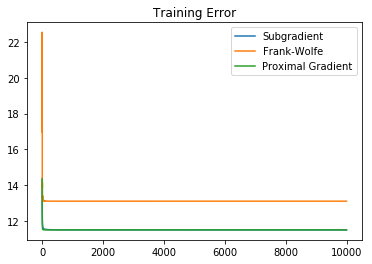

In [6]:
T = int(1e4)
A_train = np.load("A_train.npy")
b_train = np.load("b_train.npy")

A_test = np.load("A_test.npy")
b_test = np.load("b_test.npy")

x_sg, train_sg, test_sg = descent(subgradient, A_train, b_train, A_test, b_test, reg=1., T=T)
x_fw, train_fw, test_fw = descent(frank_wolfe, A_train, b_train, A_test, b_test, reg=4., T=T)
x_pg, train_pg, test_pg = descent(proxgrad, A_train, b_train, A_test, b_test, reg=3., T=T)

%matplotlib inline
plt.plot(train_sg, label="Subgradient")
plt.plot(train_fw, label="Frank-Wolfe")
plt.plot(train_pg, label="Proximal Gradient")
plt.title('Training Error')
plt.legend()



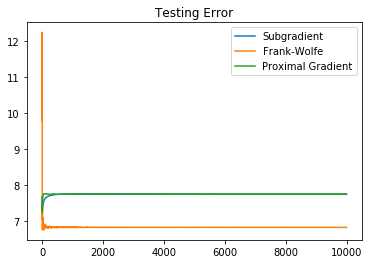

In [7]:
%matplotlib inline
plt.plot(test_sg, label="Subgradient")
plt.plot(test_fw, label="Frank-Wolfe")
plt.plot(test_pg, label="Proximal Gradient")
plt.title('Testing Error')
plt.legend()